In [3]:
import warnings
warnings.simplefilter('ignore', FutureWarning)  # FutureWarningを消している

In [4]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt

In [5]:
# 渋谷駅（スクランブル交差点）
shibuya_eki = 35.65952515598417, 139.70055390184527  # 経度、緯度

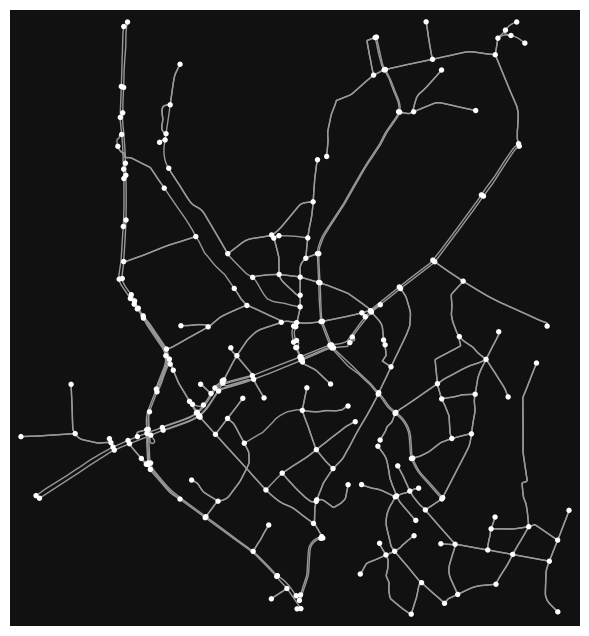

In [33]:
# 渋谷駅を中心とした半径2000mの地図を表示
dist = 2000  # meters
cf = '["highway"~"primary|trunk|tertiary|trunk_link"]'
G = ox.graph_from_point(center_point=shibuya_eki, 
                        dist=dist, 
                        network_type="drive",
                        simplify=True,
                        custom_filter=cf
                       )
fig, ax = ox.plot_graph(G)

In [34]:
# foliumを利用
import folium
fmap = ox.plot_graph_folium(G)
fmap.save(outfile="road_network.html")

# new_fmap = ox.plot_route_folium(G, route, route_map=fmap, color="red")
# folium.Marker(location=shibuya_eki, tooltip="start").add_to(new_fmap)
# folium.Marker(location=henge, tooltip="end").add_to(new_fmap)
# new_fmap.save(outfile="shortest_path_road_network.html")